In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
sc_data = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Mixture for testing/Cibersort_training_label.immune_mixture.txt', index_col=0)
sc_data

,GBM,P6GBM,P8GBM,P9GBM,PBMC,P6PBMC,P8PBMC,P9PBMC,P6GBMmixture1,P6GBMmixture2,...,P9GBMmixture91,P9GBMmixture92,P9GBMmixture93,P9GBMmixture94,P9GBMmixture95,P9GBMmixture96,P9GBMmixture97,P9GBMmixture98,P9GBMmixture99,P9GBMmixture100
Naive B,30,21,8,1,1060,447,358,255,5,8,...,0,0,1,1,1,1,0,1,0,1
Memory B,52,41,9,2,541,182,218,141,17,11,...,0,2,2,1,2,2,1,2,2,1
CD8+ naive T,47,25,15,7,433,62,201,170,7,8,...,3,5,5,5,3,5,3,4,3,6
KLRG1-low CD8+ Tcm,154,56,44,54,204,22,138,44,25,23,...,44,38,44,38,38,43,42,41,41,39
KLRG1-high CD8+ Tcm,487,191,148,148,387,68,202,117,61,66,...,111,113,110,116,117,117,112,117,114,120
Exhausted CD8+ T,13,6,1,6,0,0,0,0,1,2,...,4,5,5,5,5,5,5,4,6,4
CD8+ effector T,60,17,36,7,401,122,204,75,6,6,...,4,5,7,4,5,4,3,5,6,6
CD4+ naive T,73,44,12,17,1263,378,528,357,15,18,...,13,13,13,16,16,11,15,12,10,13
CD4+ Tcm,135,22,88,25,934,135,434,365,9,6,...,21,22,20,19,20,17,22,20,17,19
Th17-like CD4+ Tem,134,82,19,33,372,87,133,152,35,36,...,25,24,25,25,22,25,27,22,25,25


In [3]:
answer = sc_data.copy()
for i in answer.columns:
    answer[i] = answer[i]/sum(answer[i])
answer

,GBM,P6GBM,P8GBM,P9GBM,PBMC,P6PBMC,P8PBMC,P9PBMC,P6GBMmixture1,P6GBMmixture2,...,P9GBMmixture91,P9GBMmixture92,P9GBMmixture93,P9GBMmixture94,P9GBMmixture95,P9GBMmixture96,P9GBMmixture97,P9GBMmixture98,P9GBMmixture99,P9GBMmixture100
Naive B,0.008093,0.013944,0.005155,0.001541,0.124151,0.161255,0.103588,0.110390,0.010,0.016,...,0.000,0.000,0.002,0.002,0.002,0.002,0.000,0.002,0.000,0.002
Memory B,0.014028,0.027224,0.005799,0.003082,0.063364,0.065657,0.063079,0.061039,0.034,0.022,...,0.000,0.004,0.004,0.002,0.004,0.004,0.002,0.004,0.004,0.002
CD8+ naive T,0.012679,0.016600,0.009665,0.010786,0.050714,0.022367,0.058160,0.073593,0.014,0.016,...,0.006,0.010,0.010,0.010,0.006,0.010,0.006,0.008,0.006,0.012
KLRG1-low CD8+ Tcm,0.041543,0.037185,0.028351,0.083205,0.023893,0.007937,0.039931,0.019048,0.050,0.046,...,0.088,0.076,0.088,0.076,0.076,0.086,0.084,0.082,0.082,0.078
KLRG1-high CD8+ Tcm,0.131373,0.126826,0.095361,0.228043,0.045327,0.024531,0.058449,0.050649,0.122,0.132,...,0.222,0.226,0.220,0.232,0.234,0.234,0.224,0.234,0.228,0.240
Exhausted CD8+ T,0.003507,0.003984,0.000644,0.009245,0.000000,0.000000,0.000000,0.000000,0.002,0.004,...,0.008,0.010,0.010,0.010,0.010,0.010,0.010,0.008,0.012,0.008
CD8+ effector T,0.016186,0.011288,0.023196,0.010786,0.046967,0.044012,0.059028,0.032468,0.012,0.012,...,0.008,0.010,0.014,0.008,0.010,0.008,0.006,0.010,0.012,0.012
CD4+ naive T,0.019692,0.029216,0.007732,0.026194,0.147927,0.136364,0.152778,0.154545,0.030,0.036,...,0.026,0.026,0.026,0.032,0.032,0.022,0.030,0.024,0.020,0.026
CD4+ Tcm,0.036418,0.014608,0.056701,0.038521,0.109393,0.048701,0.125579,0.158009,0.018,0.012,...,0.042,0.044,0.040,0.038,0.040,0.034,0.044,0.040,0.034,0.038
Th17-like CD4+ Tem,0.036148,0.054449,0.012242,0.050847,0.043570,0.031385,0.038484,0.065801,0.070,0.072,...,0.050,0.048,0.050,0.050,0.044,0.050,0.054,0.044,0.050,0.050


In [4]:
#renaming the cell types
sc_label = answer.copy()
sc_label = sc_label.append(sc_label.iloc[2:7].sum().rename('CD8+ T'))
sc_label = sc_label.append(sc_label.iloc[8:11].sum().rename('CD4+ memory T'))
sc_label = sc_label.append(sc_label.iloc[15:17].sum().rename('NK'))
sc_label = sc_label.append(sc_label.iloc[19:21].sum().rename('Macrophagee'))
sc_label = sc_label.drop(sc_label.index[[2,3,4,5,6,8,9,10,11,12,15,16,17,19,20,22]])
sc_label = sc_label.rename(index={'Macrophagee': 'Macrophage'})
sc_final = sc_label.sort_index(ascending=True)
sc_final

,GBM,P6GBM,P8GBM,P9GBM,PBMC,P6PBMC,P8PBMC,P9PBMC,P6GBMmixture1,P6GBMmixture2,...,P9GBMmixture91,P9GBMmixture92,P9GBMmixture93,P9GBMmixture94,P9GBMmixture95,P9GBMmixture96,P9GBMmixture97,P9GBMmixture98,P9GBMmixture99,P9GBMmixture100
CD4+ memory T,0.159698,0.152722,0.143686,0.214176,0.261185,0.158730,0.286748,0.345887,0.174,0.174,...,0.228,0.226,0.204,0.214,0.210,0.210,0.224,0.220,0.206,0.220
CD4+ naive T,0.019692,0.029216,0.007732,0.026194,0.147927,0.136364,0.152778,0.154545,0.030,0.036,...,0.026,0.026,0.026,0.032,0.032,0.022,0.030,0.024,0.020,0.026
CD8+ T,0.205287,0.195883,0.157216,0.342065,0.166901,0.098846,0.215567,0.175758,0.200,0.210,...,0.332,0.332,0.342,0.336,0.336,0.348,0.330,0.342,0.340,0.350
DC,0.015107,0.007968,0.024485,0.009245,0.000586,0.001443,0.000289,0.000000,0.006,0.008,...,0.008,0.008,0.008,0.012,0.008,0.010,0.008,0.008,0.010,0.010
Macrophage,0.408956,0.331341,0.569588,0.204931,0.000234,0.000000,0.000579,0.000000,0.322,0.328,...,0.200,0.200,0.206,0.208,0.194,0.200,0.214,0.206,0.212,0.200
Memory B,0.014028,0.027224,0.005799,0.003082,0.063364,0.065657,0.063079,0.061039,0.034,0.022,...,0.000,0.004,0.004,0.002,0.004,0.004,0.002,0.004,0.004,0.002
Monocyte,0.008902,0.015936,0.004510,0.003082,0.054814,0.089466,0.045718,0.026840,0.018,0.010,...,0.004,0.004,0.004,0.004,0.002,0.002,0.004,0.004,0.004,0.004
NK,0.037497,0.053121,0.019330,0.044684,0.063598,0.085498,0.050926,0.056277,0.038,0.044,...,0.054,0.046,0.040,0.040,0.048,0.048,0.044,0.048,0.048,0.038
Naive B,0.008093,0.013944,0.005155,0.001541,0.124151,0.161255,0.103588,0.110390,0.010,0.016,...,0.000,0.000,0.002,0.002,0.002,0.002,0.000,0.002,0.000,0.002
T gamma delta,0.015107,0.010624,0.020619,0.012327,0.046381,0.096320,0.026331,0.016450,0.010,0.008,...,0.010,0.016,0.010,0.008,0.012,0.010,0.012,0.012,0.008,0.014


In [5]:
LM22_data = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Results/LM22/Training/LM22_Training_batch.txt', index_col=0)
LM22_data = LM22_data.T
cells = LM22_data.columns[:11]
LM22_data

Mixture,GBM,P6GBM,P8GBM,P9GBM,PBMC,P6PBMC,P8PBMC,P9PBMC,P6GBMmixture1,P6GBMmixture2,...,P9GBMmixture91,P9GBMmixture92,P9GBMmixture93,P9GBMmixture94,P9GBMmixture95,P9GBMmixture96,P9GBMmixture97,P9GBMmixture98,P9GBMmixture99,P9GBMmixture100
B cells naive,0.019328,0.015994,0.012272,0.018563,0.209225,0.231214,0.170113,0.204525,0.013548,0.024724,...,0.018862,0.014504,0.018282,0.017477,0.011808,0.018462,0.018753,0.017618,0.018194,0.022324
B cells memory,0.000870,0.013115,0.004684,0.000000,0.000000,0.000000,0.000000,0.000000,0.013351,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plasma cells,0.002057,0.003659,0.000000,0.000828,0.033423,0.027842,0.041439,0.026815,0.001168,0.006667,...,0.000000,0.001179,0.001406,0.001920,0.004630,0.001612,0.001541,0.001784,0.000000,0.000000
T cells CD8,0.172212,0.150579,0.154806,0.286464,0.147056,0.105850,0.242234,0.159886,0.139681,0.166525,...,0.282086,0.278526,0.292323,0.267296,0.274420,0.292974,0.270328,0.276470,0.288692,0.288115
T cells CD4 naive,0.000000,0.000000,0.000000,0.000000,0.056685,0.059047,0.061191,0.048083,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
T cells CD4 memory resting,0.165097,0.190218,0.150979,0.202672,0.172407,0.132423,0.108564,0.255658,0.207515,0.209740,...,0.207761,0.212941,0.207736,0.195184,0.221074,0.183527,0.202407,0.209931,0.190299,0.205221
T cells CD4 memory activated,0.000000,0.028451,0.001994,0.007590,0.032234,0.049414,0.002080,0.018448,0.031804,0.000000,...,0.007905,0.007220,0.000000,0.004400,0.000560,0.006647,0.000000,0.002263,0.007711,0.013913
T cells follicular helper,0.041054,0.028983,0.027444,0.039667,0.000000,0.000000,0.000000,0.000000,0.033229,0.028874,...,0.037396,0.043933,0.036184,0.045178,0.035587,0.042942,0.044880,0.033629,0.043411,0.041658
T cells regulatory (Tregs),0.004538,0.000000,0.000708,0.037850,0.006734,0.000000,0.012090,0.003496,0.000000,0.000000,...,0.039701,0.035472,0.037637,0.036254,0.027448,0.041372,0.032239,0.035278,0.032541,0.031008
T cells gamma delta,0.048162,0.067637,0.045645,0.061944,0.000000,0.000130,0.000000,0.000000,0.071583,0.052917,...,0.064344,0.066031,0.049909,0.083590,0.073964,0.072363,0.076307,0.068412,0.062522,0.060329


In [6]:
LM22_label = LM22_data
LM22_label = LM22_label.append(LM22_label.iloc[0:1].sum().rename('Naive B'))
LM22_label = LM22_label.append(LM22_label.iloc[1:2].sum().rename('Memory B'))
LM22_label = LM22_label.append(LM22_label.iloc[3:4].sum().rename('CD8+ T'))
LM22_label = LM22_label.append(LM22_label.iloc[4:5].sum().rename('CD4+ naive T'))
LM22_label = LM22_label.append(LM22_label.iloc[5:7].sum().rename('CD4+ memory T'))
LM22_label = LM22_label.append(LM22_label.iloc[9:10].sum().rename('T gamma delta'))
LM22_label = LM22_label.append(LM22_label.iloc[8:9].sum().rename('Treg'))
LM22_label = LM22_label.append(LM22_label.iloc[10:12].sum().rename('NK'))
LM22_label = LM22_label.append(LM22_label.iloc[16:18].sum().rename('DC'))
LM22_label = LM22_label.append(LM22_label.iloc[12:13].sum().rename('Monocyte'))
LM22_label = LM22_label.append(LM22_label.iloc[13:16].sum().rename('Macrophage'))
LM22_label = LM22_label.drop(LM22_label.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]])
LM22_label

Mixture,GBM,P6GBM,P8GBM,P9GBM,PBMC,P6PBMC,P8PBMC,P9PBMC,P6GBMmixture1,P6GBMmixture2,...,P9GBMmixture91,P9GBMmixture92,P9GBMmixture93,P9GBMmixture94,P9GBMmixture95,P9GBMmixture96,P9GBMmixture97,P9GBMmixture98,P9GBMmixture99,P9GBMmixture100
Naive B,0.019328,0.015994,0.012272,0.018563,0.209225,0.231214,0.170113,0.204525,0.013548,0.024724,...,0.018862,0.014504,0.018282,0.017477,0.011808,0.018462,0.018753,0.017618,0.018194,0.022324
Memory B,0.000870,0.013115,0.004684,0.000000,0.000000,0.000000,0.000000,0.000000,0.013351,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CD8+ T,0.172212,0.150579,0.154806,0.286464,0.147056,0.105850,0.242234,0.159886,0.139681,0.166525,...,0.282086,0.278526,0.292323,0.267296,0.274420,0.292974,0.270328,0.276470,0.288692,0.288115
CD4+ naive T,0.000000,0.000000,0.000000,0.000000,0.056685,0.059047,0.061191,0.048083,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CD4+ memory T,0.165097,0.218669,0.152973,0.210262,0.204641,0.181836,0.110644,0.274106,0.239319,0.209740,...,0.215666,0.220160,0.207736,0.199584,0.221634,0.190175,0.202407,0.212194,0.198010,0.219134
T gamma delta,0.048162,0.067637,0.045645,0.061944,0.000000,0.000130,0.000000,0.000000,0.071583,0.052917,...,0.064344,0.066031,0.049909,0.083590,0.073964,0.072363,0.076307,0.068412,0.062522,0.060329
Treg,0.004538,0.000000,0.000708,0.037850,0.006734,0.000000,0.012090,0.003496,0.000000,0.000000,...,0.039701,0.035472,0.037637,0.036254,0.027448,0.041372,0.032239,0.035278,0.032541,0.031008
NK,0.132980,0.093489,0.120414,0.106193,0.135927,0.179202,0.139154,0.116372,0.098266,0.106009,...,0.114575,0.109140,0.111087,0.107469,0.120126,0.107839,0.114447,0.116272,0.113308,0.098150
DC,0.026650,0.011396,0.021426,0.025838,0.015652,0.004506,0.018404,0.015223,0.011174,0.024936,...,0.027656,0.027179,0.027446,0.027796,0.028098,0.027156,0.024636,0.026065,0.027180,0.024364
Monocyte,0.040803,0.041910,0.083670,0.025512,0.072357,0.099624,0.078037,0.011050,0.052271,0.033675,...,0.013260,0.023803,0.031401,0.024720,0.019664,0.007868,0.026044,0.020248,0.032973,0.032165


In [7]:
LM22_final = LM22_label.sort_index(ascending=True)
LM22_final.to_csv('batch.txt', sep=' ')

In [8]:
#answer = sc_final.copy()
#for i in answer.columns:
#    answer[i] = answer[i]/sum(answer[i])
#answer

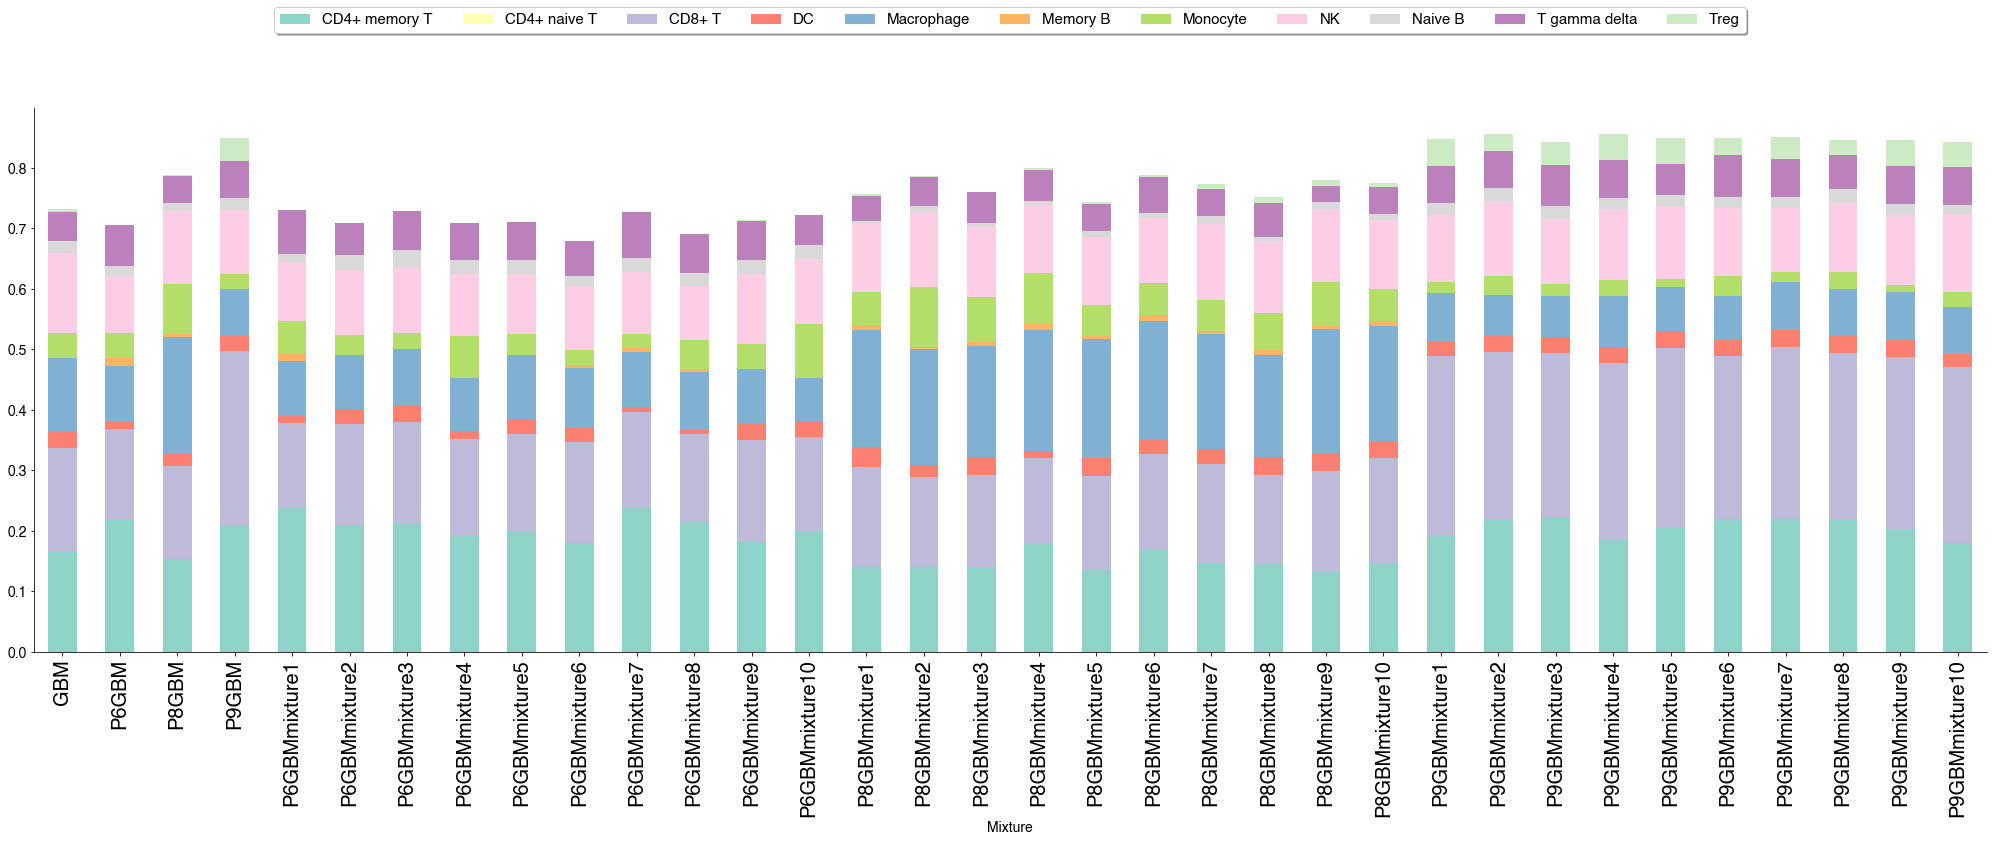

In [9]:
sns.set_palette(sns.color_palette(palette='Set3',n_colors=12) + sns.color_palette(palette='tab10_r',n_colors=10))
selected = ["GBM","P6GBM","P8GBM","P9GBM","P6GBMmixture1","P6GBMmixture2","P6GBMmixture3","P6GBMmixture4",
            "P6GBMmixture5","P6GBMmixture6","P6GBMmixture7","P6GBMmixture8","P6GBMmixture9","P6GBMmixture10",
            "P8GBMmixture1","P8GBMmixture2","P8GBMmixture3","P8GBMmixture4","P8GBMmixture5","P8GBMmixture6",
            "P8GBMmixture7","P8GBMmixture8","P8GBMmixture9","P8GBMmixture10","P9GBMmixture1","P9GBMmixture2",
            "P9GBMmixture3","P9GBMmixture4","P9GBMmixture5","P9GBMmixture6","P9GBMmixture7","P9GBMmixture8",\
            "P9GBMmixture9","P9GBMmixture10"]

plt.figure(figsize=(35,10))
ax = plt.subplot(111)
LM22_final.loc[:,selected].T.plot(kind='bar', stacked=True, ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=11, fancybox=True, shadow=True, prop={'size': 15})
plt.xticks(fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

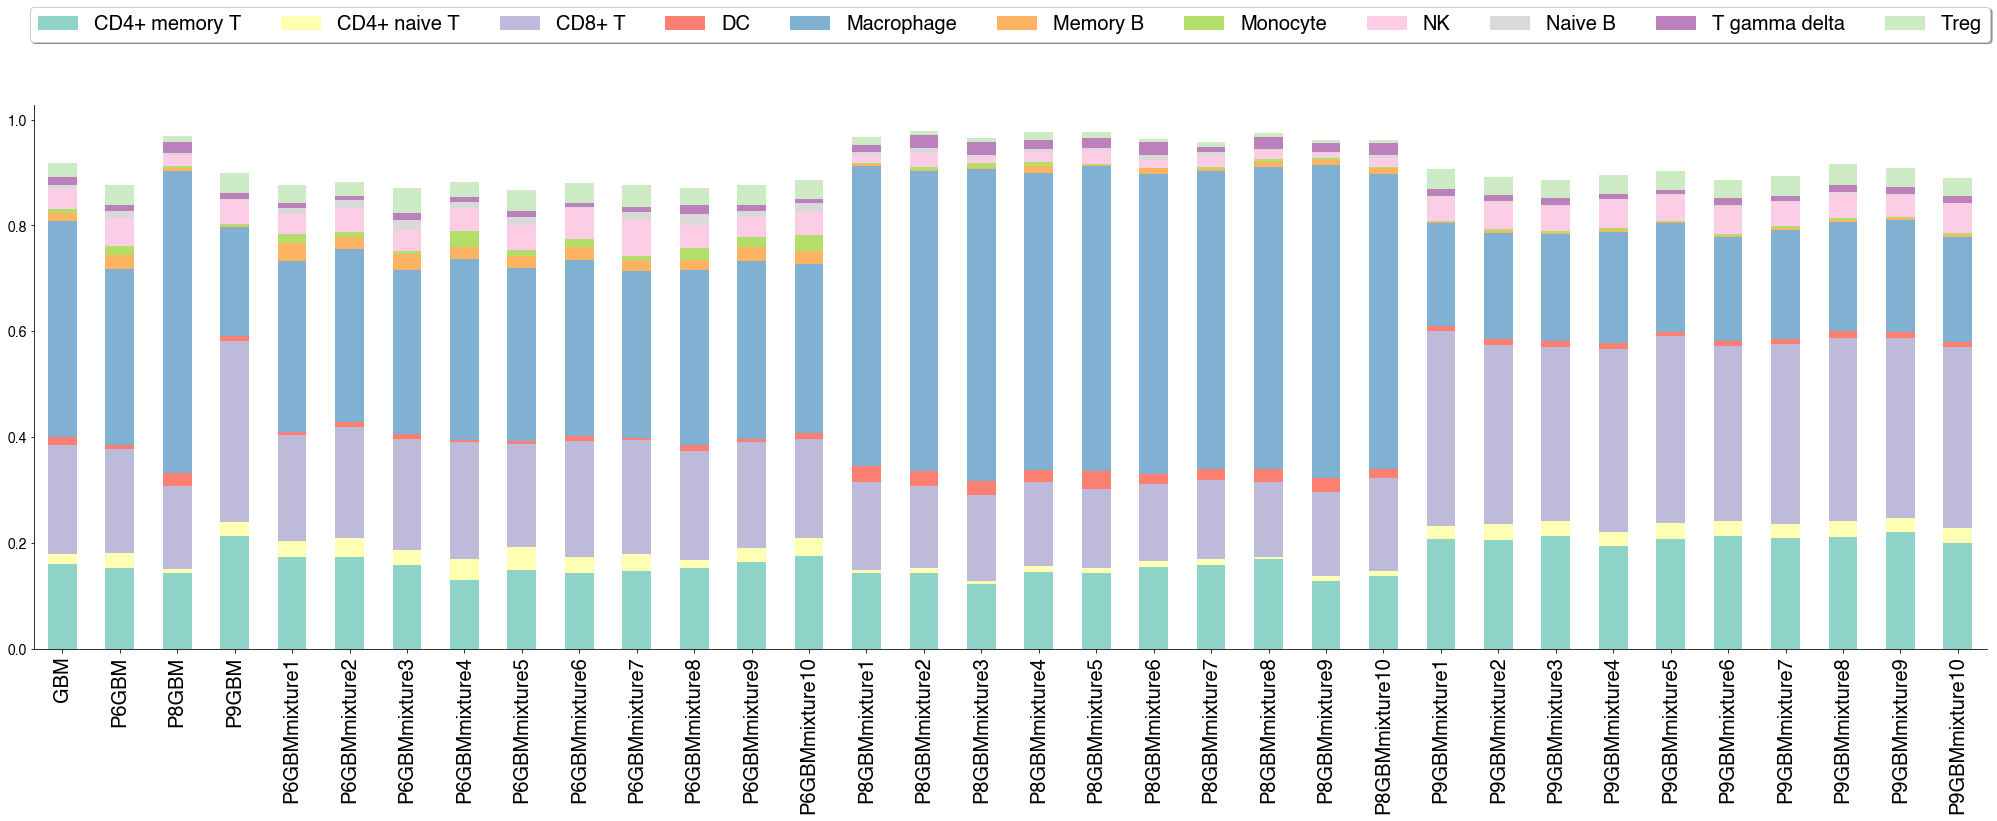

In [10]:
plt.figure(figsize=(35,10))
ax = plt.subplot(111)
sc_final.loc[:,selected].T.plot(kind='bar', stacked=True, ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=11, fancybox=True, shadow=True, prop={'size': 20})
plt.xticks(fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

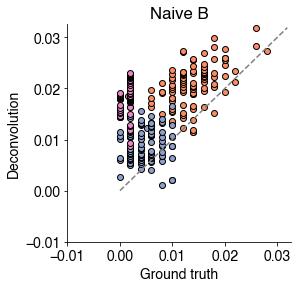

Naive B : LinregressResult(slope=0.40364587835041854, intercept=0.013359507520154556, rvalue=0.38620289017671516, pvalue=2.982347001185878e-12, stderr=0.055476282470309626, intercept_stderr=0.0004991737844637195)
Naive B PCC: (0.38620289017671516, 2.982347001185594e-12)
Naive B SCC: SpearmanrResult(correlation=0.28042269437950723, pvalue=6.721104475976912e-07)
Naive B MSE: 0.00013423349151394805
-----------------------------------------------------------------------------


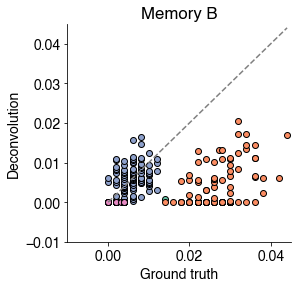

Memory B : LinregressResult(slope=0.09291993095953045, intercept=0.0022677009283284563, rvalue=0.23478991233118837, pvalue=3.55292558486816e-05, stderr=0.02213669865255354, intercept_stderr=0.00036317775759561467)
Memory B PCC: (0.23478991233118812, 3.552925584867928e-05)
Memory B SCC: SpearmanrResult(correlation=0.31568198867324476, pvalue=1.8450200400443803e-08)
Memory B MSE: 0.00019596018416420633
-----------------------------------------------------------------------------


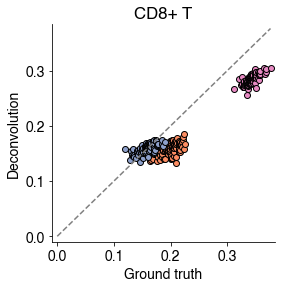

CD8+ T : LinregressResult(slope=0.7249752603650409, intercept=0.03157848819382911, rvalue=0.9658494407402669, pvalue=3.513370828925284e-179, stderr=0.011191397442554863, intercept_stderr=0.002757384213399259)
CD8+ T PCC: (0.9658494407402676, 3.5133708289148355e-179)
CD8+ T SCC: SpearmanrResult(correlation=0.793119759633057, pvalue=5.370001677852775e-67)
CD8+ T MSE: 0.00178112622034673
-----------------------------------------------------------------------------


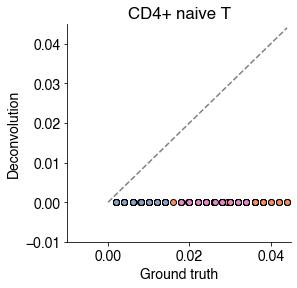

CD4+ naive T : LinregressResult(slope=0.0, intercept=0.0, rvalue=0.0, pvalue=1.0, stderr=0.0, intercept_stderr=0.0)
CD4+ naive T PCC: (nan, nan)
CD4+ naive T SCC: SpearmanrResult(correlation=nan, pvalue=nan)
CD4+ naive T MSE: 0.0005716951049392214
-----------------------------------------------------------------------------


/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


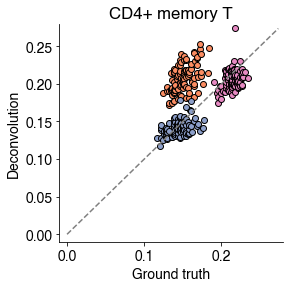

CD4+ memory T : LinregressResult(slope=0.5477924343710353, intercept=0.09210041113471638, rvalue=0.5371617815933339, pvalue=4.0039180905683864e-24, stderr=0.049497338631009816, intercept_stderr=0.008556113774765886)
CD4+ memory T PCC: (0.5371617815933337, 4.003918090568196e-24)
CD4+ memory T SCC: SpearmanrResult(correlation=0.539576086920042, pvalue=2.293643650150553e-24)
CD4+ memory T MSE: 0.001278637391277616
-----------------------------------------------------------------------------


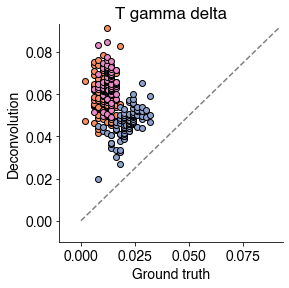

T gamma delta : LinregressResult(slope=-0.7519336413212483, intercept=0.06788970593914546, rvalue=-0.4062274911543449, pvalue=1.6553209200079242e-13, stderr=0.09732951706789783, intercept_stderr=0.0015489875553150688)
T gamma delta PCC: (-0.40622749115434464, 1.655320920007814e-13)
T gamma delta SCC: SpearmanrResult(correlation=-0.4533299601443164, pvalue=8.190651590927989e-17)
T gamma delta MSE: 0.0019686002337323204
-----------------------------------------------------------------------------


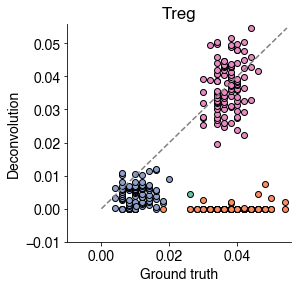

Treg : LinregressResult(slope=0.43602527717236883, intercept=0.0013688360967305004, rvalue=0.34947407759928323, pvalue=3.683309756873343e-10, stderr=0.06726788993441435, intercept_stderr=0.0021377756987629227)
Treg PCC: (0.34947407759928256, 3.683309756873337e-10)
Treg SCC: SpearmanrResult(correlation=0.055266609428543334, pvalue=0.33686865837103697)
Treg MSE: 0.0005369080961434127
-----------------------------------------------------------------------------


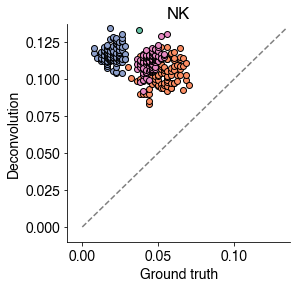

NK : LinregressResult(slope=-0.25764883345171197, intercept=0.12091046081445873, rvalue=-0.4454535810638396, pvalue=3.180041883605384e-16, stderr=0.029798423052626838, intercept_stderr=0.0012441582784713768)
NK PCC: (-0.4454535810638395, 3.1800418836051603e-16)
NK SCC: SpearmanrResult(correlation=-0.41768022275922256, pvalue=2.896870255913439e-14)
NK MSE: 0.005625974598682218
-----------------------------------------------------------------------------


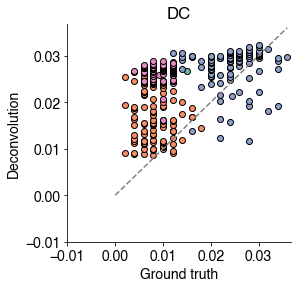

DC : LinregressResult(slope=0.3323355083270484, intercept=0.018908119575704783, rvalue=0.42360686882714976, pvalue=1.1448498616793192e-14, stderr=0.04089448247680973, intercept_stderr=0.0006573175108343125)
DC PCC: (0.4236068688271494, 1.1448498616792862e-14)
DC SCC: SpearmanrResult(correlation=0.5115417771864127, pvalue=1.1327617390371298e-21)
DC MSE: 0.00015602899206783064
-----------------------------------------------------------------------------


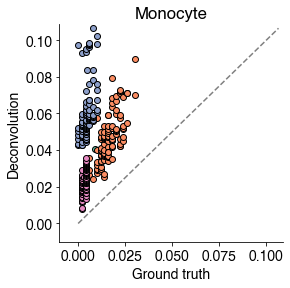

Monocyte : LinregressResult(slope=0.8976425561467685, intercept=0.037026871293884926, rvalue=0.3103910962606762, pvalue=3.2639150651857425e-08, stderr=0.1581949459153675, intercept_stderr=0.0016757273627768588)
Monocyte PCC: (0.3103910962606762, 3.263915065185415e-08)
Monocyte SCC: SpearmanrResult(correlation=0.41414372109786396, pvalue=4.997567873787408e-14)
Monocyte MSE: 0.0016543390016658778
-----------------------------------------------------------------------------


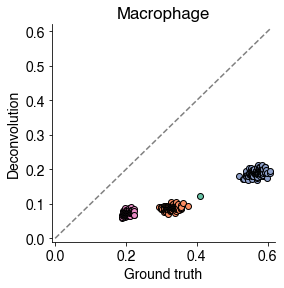

Macrophage : LinregressResult(slope=0.33207252077705934, intercept=-0.0038039797277708426, rvalue=0.9657911885514868, pvalue=4.5245112897269235e-179, stderr=0.005130786145545927, intercept_stderr=0.0020399071758173456)
Macrophage PCC: (0.9657911885514869, 4.524511289724617e-179)
Macrophage SCC: SpearmanrResult(correlation=0.9073445418666195, pvalue=1.1112778800872789e-115)
Macrophage MSE: 0.07258473281237376
-----------------------------------------------------------------------------


In [11]:
# in this section, we automatically loop through all the 22 cell types and generate the results

cells = list(LM22_label.index)
c_sample = ['GBM','P6GBM','P8GBM','P9GBM']
c_color = sns.color_palette(palette='Set2', n_colors=len(c_sample))

for c in cells:
    tmp = pd.DataFrame({'answer':sc_final.loc[c,:], 'prediction':LM22_final.loc[c,:]},
                  index=answer.columns)
    t = []
    for i in tmp.index:
        sid = i.replace("cells","").replace("all","")
        if sid.find("mixture")!=-1:
            sid = sid[:(sid.find('mixture'))]
        t.append(sid)
    tmp['sample'] = pd.Series(t, index=tmp.index)
    tmp = tmp[tmp['sample'].isin(c_sample)]
    tmp.sort_values(by=['answer','prediction','sample'], inplace=True)
    
    plt.figure(figsize=(4,4))
    ax = plt.subplot(111)
    for i in range(len(c_sample)):
        #for j in sorted(set(tmp[tmp['sample']==c_sample[i]]['totalcell'])):
        tmptmp = tmp[(tmp['sample']==c_sample[i])]
        scatter = ax.scatter(tmptmp['answer'], 
                    tmptmp['prediction'], 
                    color=c_color[i], label=c_sample[i],
                    edgecolors='black')
            
    # plot fitted line
    #m, b = np.polyfit(tmp['answer'], tmp['prediction'], 1)
    #plt.plot(tmp['answer'], m*tmp['answer'] + b, color='grey', linestyle='--')

    # plot straight line
    vmax = max(max(tmp['prediction']), max(tmp['answer']))
    plt.plot([0,vmax], [0,vmax], color='grey', linestyle='--')
    plt.xlim((-0.01,vmax*1.02))
    plt.ylim((-0.01,vmax*1.02))

#     plt.legend(['fitting']+c_sample, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(c)
    plt.xlabel('Ground truth'); plt.ylabel('Deconvolution')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()
    
    print(c,":",linregress(tmp['answer'], tmp['prediction']))
    print(c,"PCC:",pearsonr(tmp['answer'], tmp['prediction']))
    print(c,"SCC:",spearmanr(tmp['answer'], tmp['prediction']))
    print(c,"MSE:",mean_squared_error(tmp['answer'], tmp['prediction']))
    print("-----------------------------------------------------------------------------")

In [12]:
mean_squared_error(sc_final, LM22_final)

0.0078092930599766765